Learnings

1. Import requried library for Time series analysis - statsmodels,graphics( for plotting pcf ), mse
2. load the data with parse date parameter for date field loading
3. Timeseries default plot - line plot
4. Use seasonal decompose component to identify the trend - either mul/additive
5. ploat acf identify the shift component importance
6. Train and test. Then fit for entire dataset
7. Calculate MAE,RMSE 

In [1]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

In [2]:
df = pd.read_csv('choco_monthly_revenue.csv', index_col= 0, parse_dates=True)
df.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


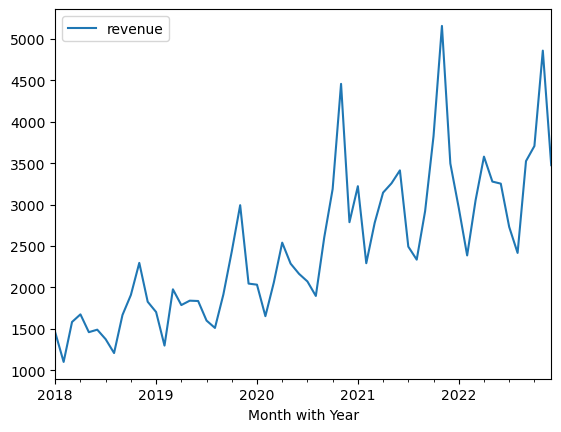

In [3]:
df.plot();

In [4]:
df = df.asfreq('MS')

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot

In [6]:
sd = seasonal_decompose(df, model='mul',period=12)

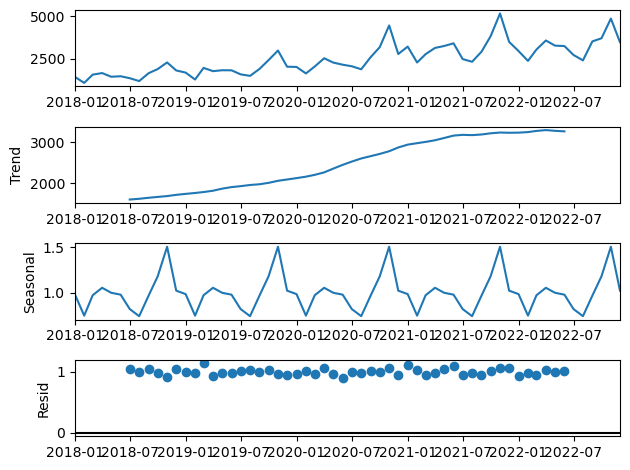

In [7]:
sd.plot();

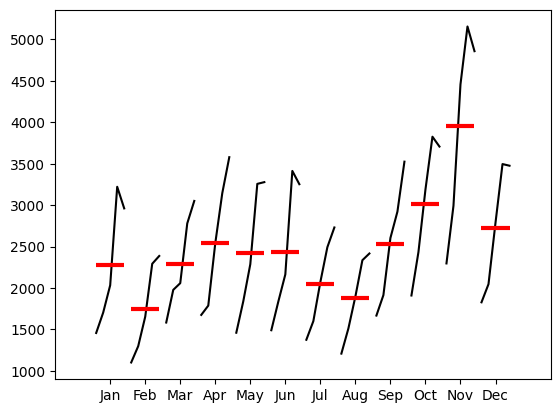

In [23]:
month_plot(df);

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

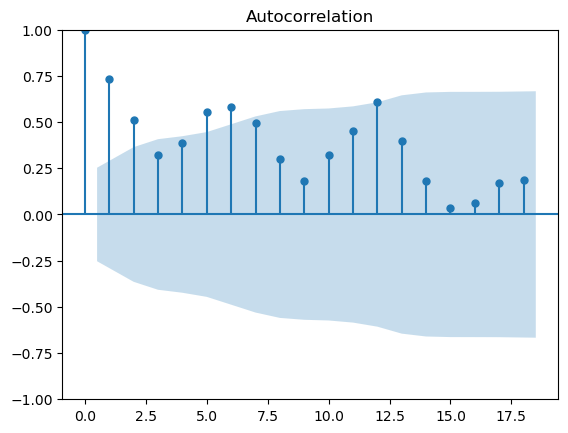

In [9]:
plot_acf(df);

In [10]:
train, test = df.iloc[:-3], df.iloc[-3:]

In [11]:
train.tail()

,revenue
Month with Year,
2022-05-01,3278
2022-06-01,3253
2022-07-01,2731
2022-08-01,2417
2022-09-01,3525


In [12]:
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

In [13]:
prediction = model.forecast(3).rename('HW')

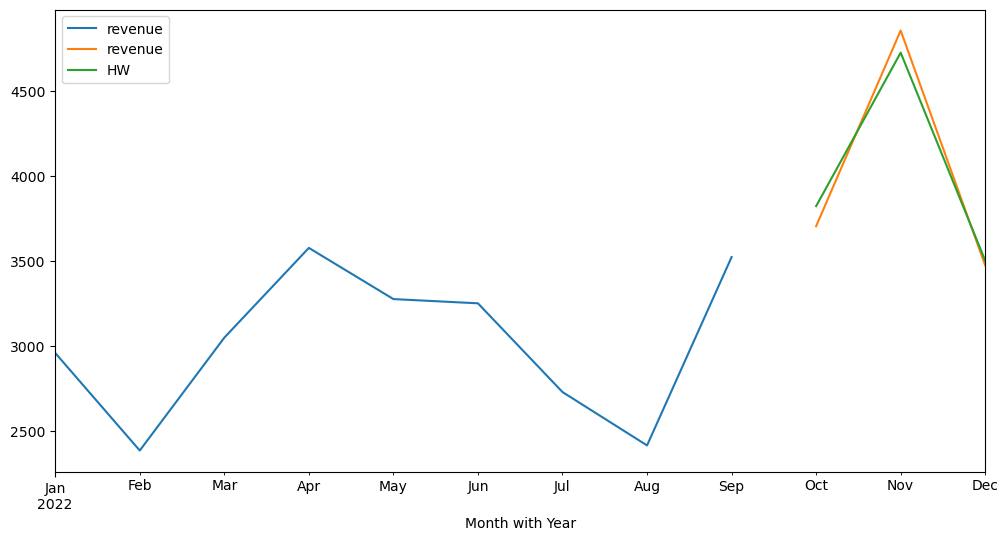

In [14]:
train['revenue']['2022-01-01':].plot(figsize=(12,6), legend=True)
test['revenue'].plot(legend=True)
prediction.plot(legend=True);

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mean_absolute_error(test,prediction)

91.87319828877405

In [17]:
mean_squared_error(test,prediction,squared=False)

102.61369602023544

In [18]:
model.forecast(6)

2022-10-01    3824.689549
2022-11-01    4727.717669
2022-12-01    3503.647715
2023-01-01    3384.133752
2023-02-01    2876.724433
2023-03-01    3427.400205
Freq: MS, dtype: float64

In [19]:
model_final = ExponentialSmoothing(endog = df['revenue'], trend = 'add',
                             seasonal = 'add',
                             seasonal_periods = 12).fit()

In [20]:
predictions_final = model_final.forecast(steps = 3).rename("HW")
predictions_final.head()

2023-01-01    3465.561441
2023-02-01    2901.933777
2023-03-01    3461.067809
Freq: MS, Name: HW, dtype: float64

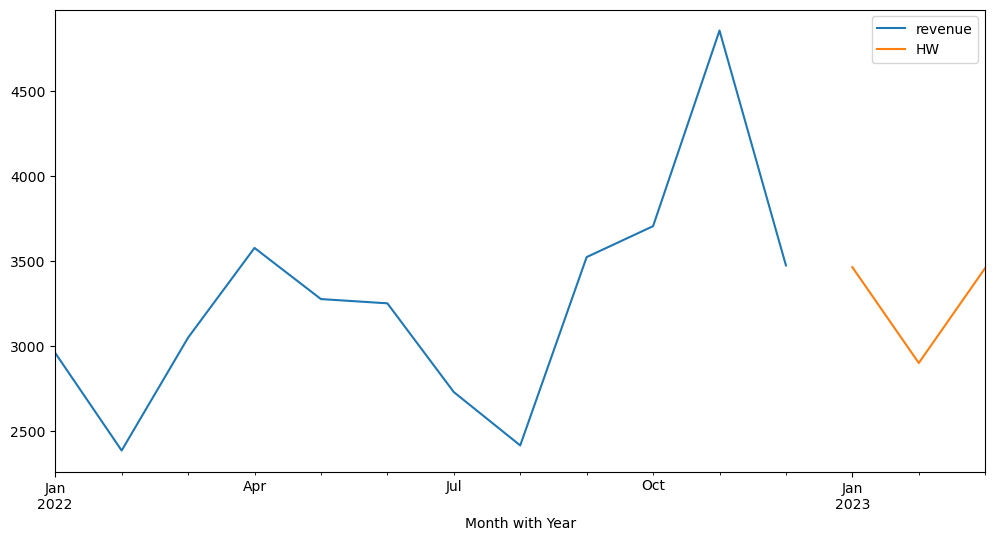

In [21]:
df['revenue']['2022-01-01':].plot(figsize = (12,6), legend = True)
predictions_final.plot(legend = True);

In [22]:
predictions_final.sum() / df['revenue']['2022-01-01':'2022-03-01'].sum() - 1

0.1702063373148237